# importing modules

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# creating dataset

In [3]:
def generate_dataset(range_start, range_end, sample_size=1000, noise_std=10.0):
    noise = np.random.normal(0, noise_std, size=sample_size) # for a more realistic dataset we add some noise
    X = np.random.uniform(range_start, range_end, size=sample_size)
    y = y = (0.2 * X**6 
         - 0.5 * X**5 
         + 2 * X**4 
         - 5 * X**3 
         + 3 * X**2 
         - 10 * X 
         + 5 
         + noise)

    return X, y


# visualizing dataset

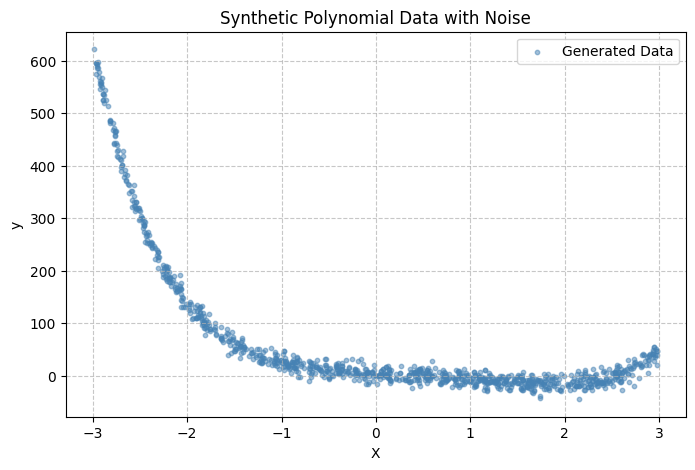

In [4]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=10, alpha=0.5, color='steelblue', label='Generated Data')
plt.title('Synthetic Polynomial Data with Noise')
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# splitting the dataset
this part has three steps:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_out, y_out = generate_dataset(5,7)
_, X_out_test, _, y_out_test = train_test_split(X_out, y_out, test_size=.2, random_state=42)

# visualizing dataset

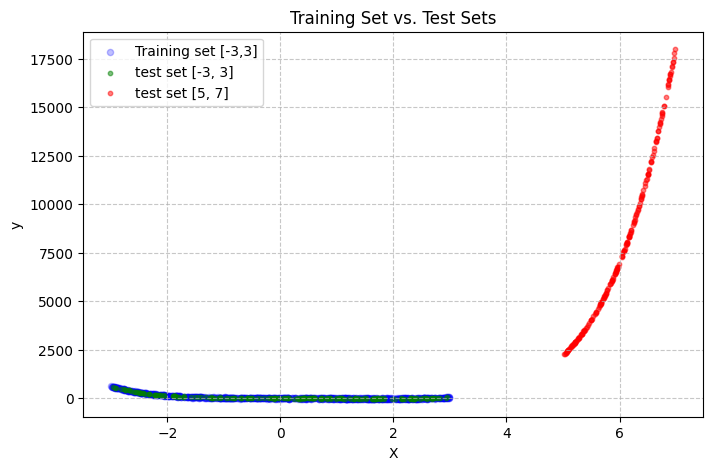

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, s=20, alpha=0.25, color='blue', label='Training set [-3,3]')
plt.scatter(X_test, y_test, s=10, alpha=0.5, color='green', label='test set [-3, 3]')
plt.scatter(X_out_test, y_out_test, s=10, alpha=0.5, color='red', label='test set [5, 7]')
plt.title('Training Set vs. Test Sets')
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# polynomial regression training

In [7]:
def train_models(x, y, degree):
    
    lr = LinearRegression()
    feature = PolynomialFeatures(degree=degree)
    model = make_pipeline(feature, lr)
    model.fit(x.reshape(-1, 1), y)

    return model

In [8]:
models = {}
last_degree = 9
for d in range(2, last_degree+1):
    models[d] = train_models(X_train, y_train, d)
models

{2: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 3: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 4: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                 ('linearregression', LinearRegression())]),
 5: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                 ('linearregression', LinearRegression())]),
 6: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                 ('linearregression', LinearRegression())]),
 7: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                 ('linearregression', LinearRegression())]),
 8: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                 ('linearregression', LinearRegression())]),
 9: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(d

# model evaluation

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)
    
    return losses

In [10]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test, y_test)
losses_out_of_range = evaluate_models(models, X_out_test, y_out_test)

In [11]:
print(losses_train, "\n", losses_in_range, "\n", losses_out_of_range)

{2: 2599.3313358063388, 3: 888.5446204028792, 4: 132.8781535302138, 5: 105.0467721126948, 6: 97.5236863809577, 7: 97.51206690388601, 8: 97.49615378640567, 9: 97.39425254724036} 
 {2: 2156.2222187189145, 3: 776.0858610971816, 4: 134.37598202040078, 5: 120.51264193477228, 6: 113.46644676732339, 7: 113.66724297656354, 8: 113.71306993910734, 9: 113.35059277166472} 
 {2: 71145387.71242721, 3: 107704075.12163328, 4: 27389131.304065794, 5: 84473082.86558841, 6: 771989.6597789838, 7: 266034.3974733314, 8: 39952820.5086128, 9: 4563542810.533963}


# Analyzing Model Scores

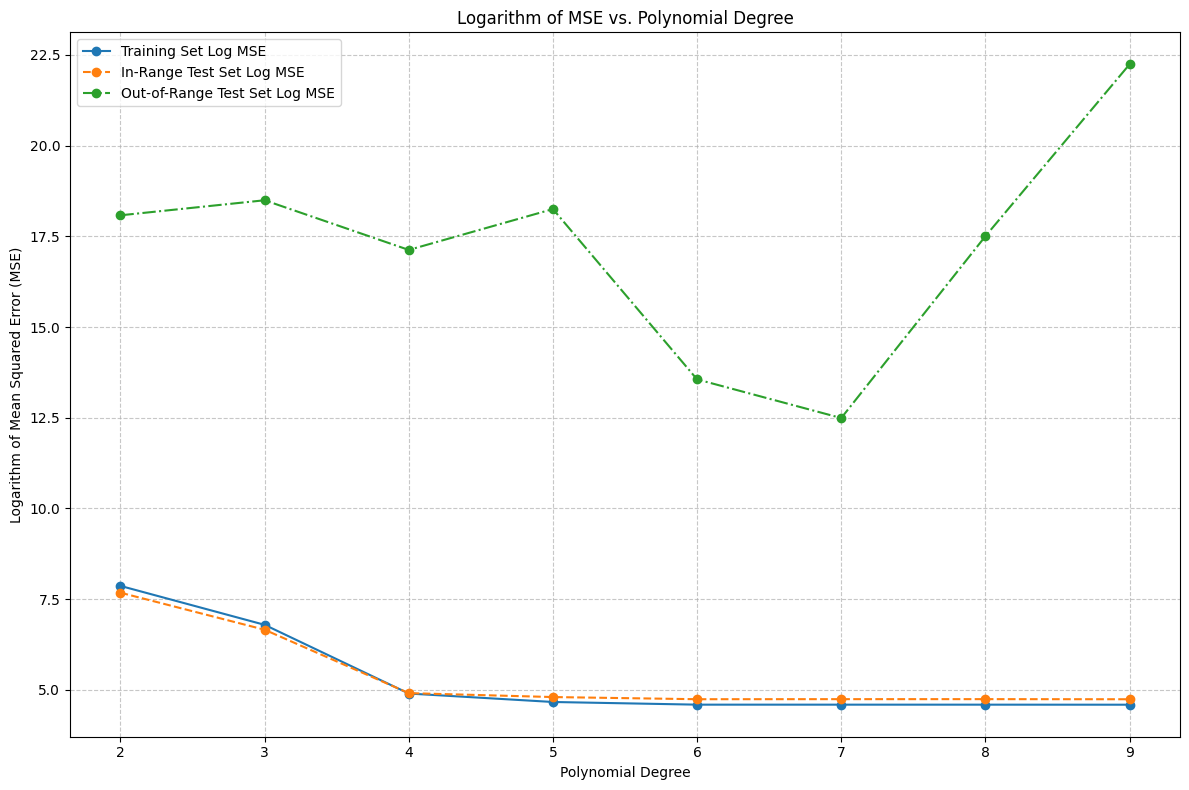

In [12]:
log_losses_train = np.log1p(list(losses_train.values()))
log_losses_in_range = np.log1p(list(losses_in_range.values()))
log_losses_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, last_degree+1)
plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losses_train), marker='o', linestyle='-', label='Training Set Log MSE')
plt.plot(degrees, list(log_losses_in_range), marker='o', linestyle='--', label='In-Range Test Set Log MSE')
plt.plot(degrees, list(log_losses_out_of_range), marker='o', linestyle='-.', label='Out-of-Range Test Set Log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()

In [13]:
print(f"{'Degree':<10}{'Train MSE':<20}{'In-Range Test MSE':<20}{'Out-of-Range Test MSE':<20}")
for i in range(last_degree - 1):
    print(f"{i + 2:<10}{log_losses_train[i]:<20.2f}{log_losses_in_range[i]:<20.2f}{log_losses_out_of_range[i]:<20.2f}")

Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE
2         7.86                7.68                18.08               
3         6.79                6.66                18.49               
4         4.90                4.91                17.13               
5         4.66                4.80                18.25               
6         4.59                4.74                13.56               
7         4.59                4.74                12.49               
8         4.59                4.74                17.50               
9         4.59                4.74                22.24               
